# Rapport de projet de session - IFT 712
### Objectif du projet : tester six méthodes de classification sur une base de données Kaggle.

Nous avons choisi la base de données "[Heart Failure Prediction Dataset][0]" puisqu'elle permet de faire de la classification sur un jeu de données réel et avec des applications concrètes.
Les méthodes de classification que nous allons tester sont les suivantes :
* Modèle génératif
* K plus proches voisins
* Régression logistique
* Méthode à noyaux
* SVM
* Perceptron multicouches

Pour cela, nous utiliserons la bibliothèque scikit-learn pour implémenter les algotihmes ainsi que pandas  pour traiter les données

Nous utiliserons également [Trello][1] ainsi que discord afin d'organiser le projet
Le code est versionné sur [Github][1] en suivant les conventions suivantes :
* conventionals [commits][3]
* merge requests sur master
* une branche par feature (i.e par algorithme de classification)

Le code et les commentaires sont rédigés en francais et suivant la convention [pep8][4]. Nous utiliserons la fonctionnalité "code with me" de pycharm permettant à plussieurs membres du groupe de coder sur le même projet en même temps

[0]: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction
[1]: https://trello.com/b/U21MHLaj/projet-ift712-deadline-11-12-23
[2]: https://github.com/MorganChabaudENSSAT/projet_ift712
[3]: https://www.conventionalcommits.org/en/v1.0.0/
[4]: https://peps.python.org/pep-0008/

In [1]:
'''
 Imporation des bibliothèques python générales
'''
import numpy as np
import pandas as pd
from sklearn.exceptions import ConvergenceWarning
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import warnings

'''
 Imporation des bibliothèques spécifiques au devoir
'''
from regression_logistique import RegressionLogistique
from svm import Svm
from reseau_neurones import Reseau_neurones
import utils

'''
    Suppression des Future Warnings 
'''
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=ConvergenceWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [2]:
# Importation des données
df = pd.read_csv('heart.csv') # Dataframe contenant les données
features_names = df.columns
features_nbr = features_names.shape[0]
print(f"nombre de features dans le dataset : {features_nbr}")
# Visualisation des données pour mieux les comprendre
print(df.head())
print(df.dtypes)

nombre de features dans le dataset : 12
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR   
0   40   M           ATA        140          289          0     Normal    172  \
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  
Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG 

In [3]:
# A partir de cette visualisation primaire des données, on  remarque que certaines features ne sont pas numériques ce qui empêche de les utiliser telles quelles dans les algorithmes de classification.
# => On va donc devoir traiter ces valeurs en les encodant.
le = LabelEncoder()

data = df.copy(deep = True)

data['Sex'] = le.fit_transform(data['Sex'])
data['ChestPainType'] = le.fit_transform(data['ChestPainType'])
data['RestingECG'] = le.fit_transform(data['RestingECG'])
data['ExerciseAngina'] = le.fit_transform(data['ExerciseAngina'])
data['ST_Slope'] = le.fit_transform(data['ST_Slope'])

# Les données sont mainteant toutes numériques et utilisables par les algorithmes de classification que nous mettrons en place
print(data)

     Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG   
0     40    1              1        140          289          0           1  \
1     49    0              2        160          180          0           1   
2     37    1              1        130          283          0           2   
3     48    0              0        138          214          0           1   
4     54    1              2        150          195          0           1   
..   ...  ...            ...        ...          ...        ...         ...   
913   45    1              3        110          264          0           1   
914   68    1              0        144          193          1           1   
915   57    1              0        130          131          0           1   
916   57    0              1        130          236          0           0   
917   38    1              2        138          175          0           1   

     MaxHR  ExerciseAngina  Oldpeak  ST_Slope  Hear

A présent, on explore les données à l'aide de visualisations afin de mieux comprendre leur nature et détecter les features les plus caractéristiques ainsi que la nature des distributions des données afin, au besoin, de formuler des hypothèses nous permettant de mettre en oeuvre différents modèles.
On commence par visualiser la distribution de chaque feature.

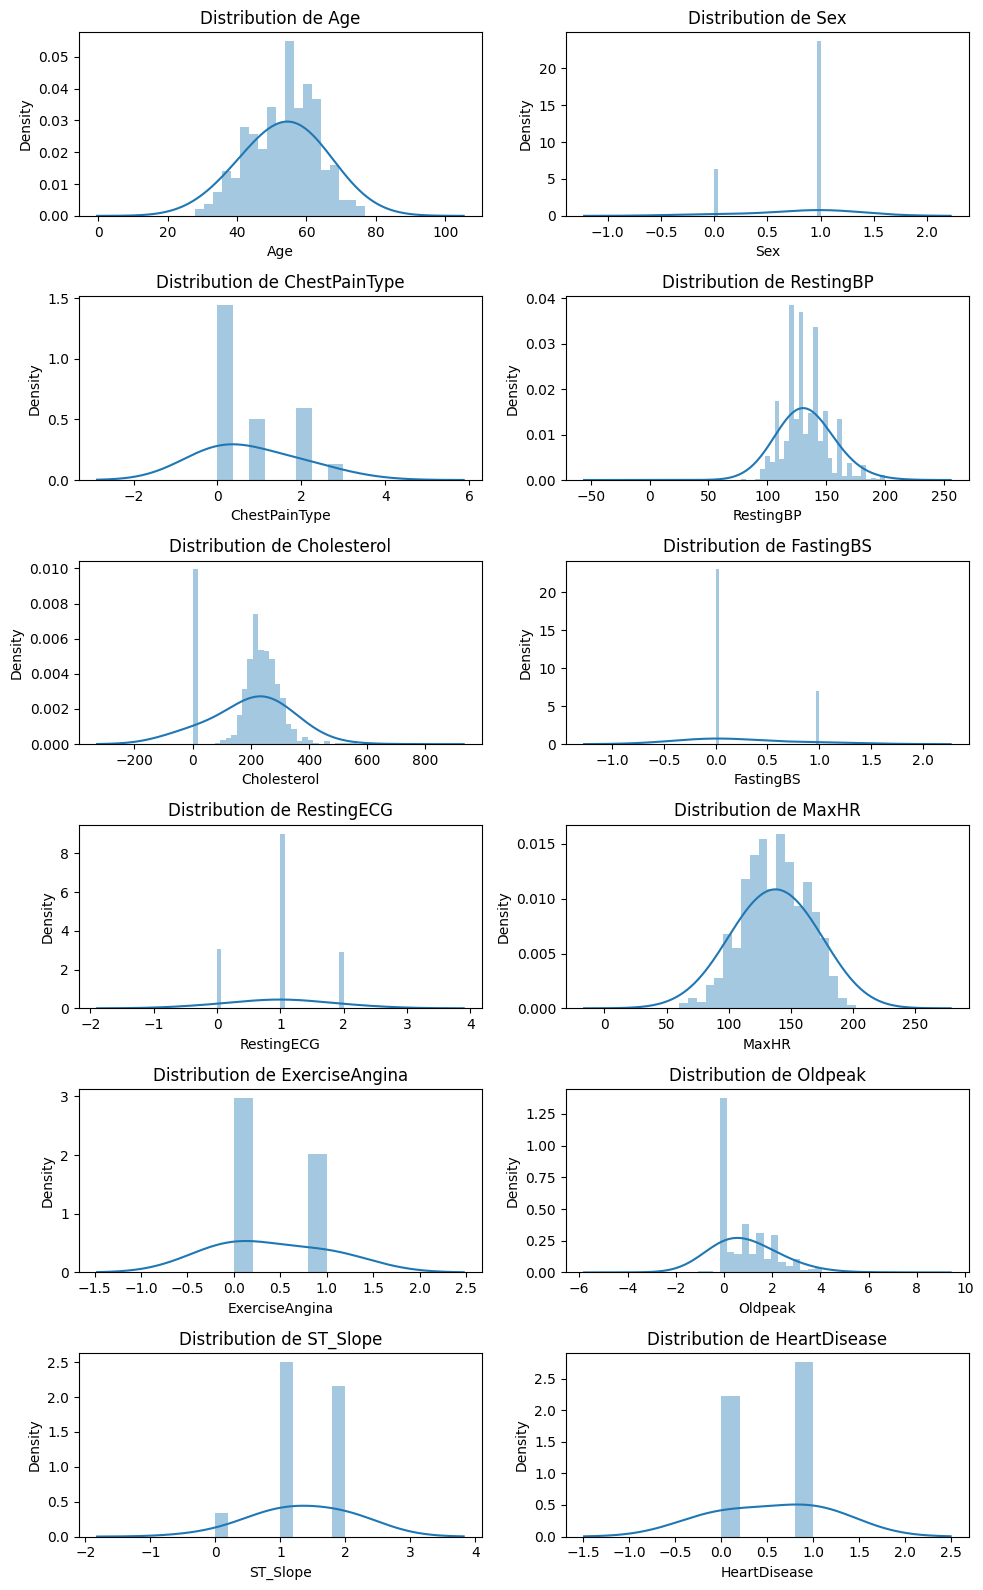

In [4]:
fig = plt.figure(figsize=(10,16))
for i in range(features_nbr):
    plt.subplot(int(features_nbr/2), 2, i+1)
    fig.tight_layout()
    cur_feature =features_names[i]
    sns.distplot(data[cur_feature], kde_kws={'bw' : 1})
    plt.title("Distribution de "+cur_feature)

Les données semblent suivre approximativement une distribution normale dans une majorité de cas. On assumera donc dans la suite du projet, lorsque cela est nécessaire que les données suivent une lois normale.

## 1 - Régression logistique ##

In [5]:
# Création du modèle
reg_log=RegressionLogistique(data, features_names, features_nbr)

On met à l'echelle les données afin de réduire l'impact des différentes valeurs que peuvent prendre les données sur la précision du modèle.
La visualisation des données a mis en évidence les phénomènes suivants:
- blablabla
- ascqs
- qfds

On normalise les donées correspondant aux features ..... de sorte à les ramener entre 0 et 1
On standardise les données suivant déjà une distribution gaussienne  pour empêcher le svelurs extrèmes de fausser les résultats.

In [6]:
# Mise à echelle des données
scaled_data = reg_log.scale_data()
# Récupération des ensembles d'entraînements et de validation
X_train, X_test, y_train, y_test = reg_log.split_data(scaled_data)

In [7]:
# Entraînement du modèle sur les données d'entraînement
reg_log.train(X_train, y_train)

In [8]:
# Evaluation du modèle
reg_log.evaluate_model(X_test,y_test)

0.8586956521739131
Le score de validation croisée est :  0.8096096096096096 avec un déviation standard de :  0.07300694966497415
[[69 14]
 [12 89]]
accuracy du modèle : 0.8586956521739131


FAux :On cherche à présent à augmenter la capacité du modèle.
Pour cela, on utilise implémente une 'cross-validation' et comparons les résultats fournis par le modèle de régression linéaire avec et sans cross-validation

In [9]:
reg_log2 = RegressionLogistique(data, features_names, features_nbr)
reg_log2.train(X_train, y_train, cross_val=True)

In [10]:
# Evaluation du modèle avec cross_validation
reg_log2.evaluate_model(X_test,y_test)

0.8586956521739131
Le score de validation croisée est :  0.8096096096096096 avec un déviation standard de :  0.07300694966497415
[[69 14]
 [12 89]]
accuracy du modèle : 0.8586956521739131


## 3 - Machine à Vecteurs de Support ##

Pour la classification à l'aide de SVM, nous allons vérifier les performances des différents types de noyaux, afin de trouver le meilleur modèle possible.
Dépendemment du type de noyau utilisé, nous tenterons d'optimiser les hyper-paramètres de chaque modèle afin de trouver le meilleur modèle pour chaque noyau, puis nous comparerons les résultats.
### 3.1 - SVM à noyau linéaire
Dans le cas du noyau linéaire, il n'existe pas d'hyperparamètres à optimiser comme indiqué dans la documentation sklearn de la classe Support Vector Classification.

accuracy du modèle : 0.8695652173913043


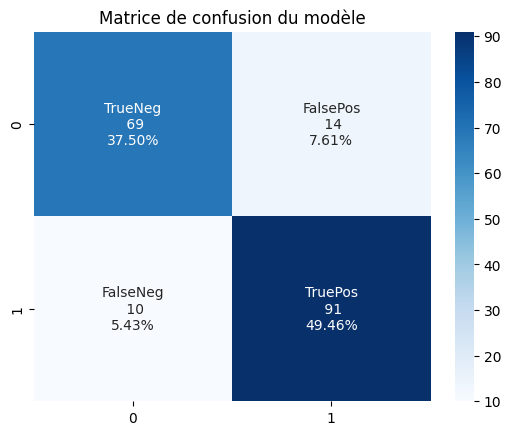

In [11]:
# Création du modèle avec noyau linéaire
linear_svm_instance = Svm(data, features_names, features_nbr, model='linear')
# Récupération des ensembles d'entraînements et de validation
X_train, X_test, y_train, y_test = linear_svm_instance.split_data(data)
# Entraînement du modèle sur les données d'entraînement
linear_svm_instance.train(X_train, y_train)
# Evaluation du modèle
linear_svm_instance.evaluate_model(X_test,y_test, confusion_matrix=True)

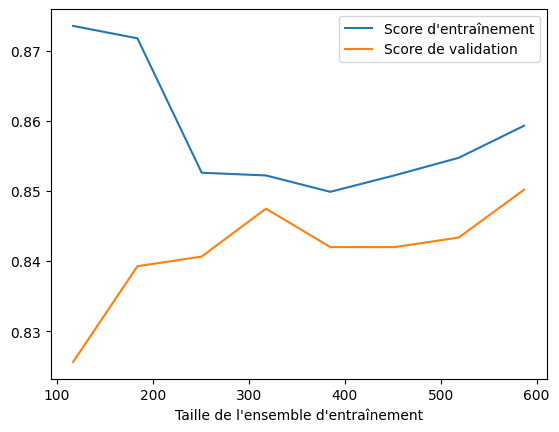

In [12]:
train_size = np.linspace(0.2, 1, 8)
linear_svm_instance.plot_learning_curves(X_train, y_train, train_size)

Le fait que les courbes de score évoluent sensiblement de la même façon à partir d'une taille de 350 indique que l'ajustement est relativement approprié.

### 3.1 - SVM à noyau Radial Basis Function
On s'intéresse maintenant à la classification par machines à vecteurs de support avec un noyau RBF. Dans ce cas, les paramètres optimisables sont gamma et C.
Le paramètre C équilibre la classification incorrecte des exemples d'entraînement par rapport à la simplicité de la surface de décision.Plus C est grand, plus le modèle risque le sur-apprentissage. Le paramètre gamma définit l'influence qu'a un exemple d'entraînement unique, et donc plus gamma est grand, plus les autres exemples doivent être proches pour être affectés. Observons d'abord le résultat brut de classification sans optimisation des hyper-paramètres du modèle à noyau RBF.

accuracy du modèle : 0.8858695652173914


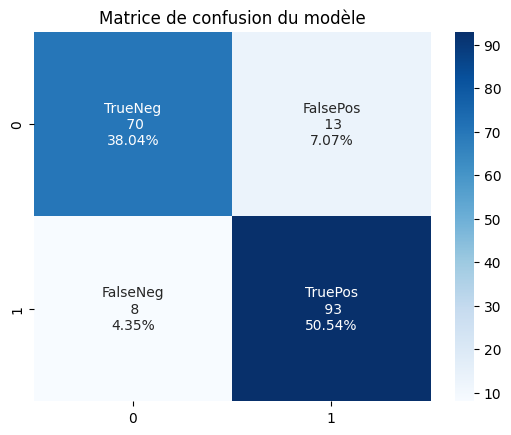

In [13]:
# Création du modèle avec noyau rbf
rbf_svm_instance = Svm(data, features_names, features_nbr, model='rbf')
# Récupération des ensembles d'entraînements et de validation
X_train, X_test, y_train, y_test = rbf_svm_instance.split_data(data)
# Entraînement du modèle sur les données d'entraînement
rbf_svm_instance.train(X_train, y_train)
# Evaluation du modèle
rbf_svm_instance.evaluate_model(X_test,y_test)

Observons les scores d'entraînement et de validation avant optimisation.

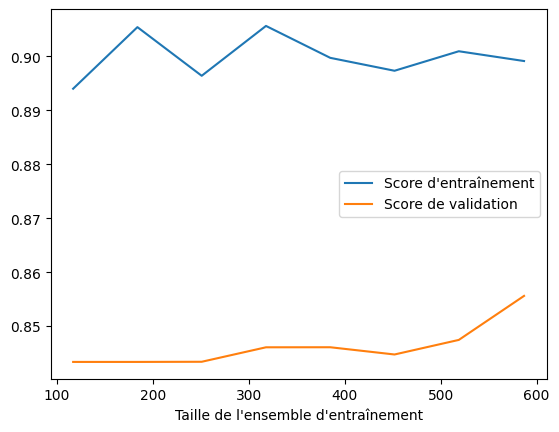

In [14]:
rbf_svm_instance.plot_learning_curves(X_train, y_train, train_size)

On va maintenant tenter d'optimiser les paramères gamma et C à l'aide d'un GridSearch de sorte à obtenir le meilleur modèle possible. Ces paramètres sont cruciaux pour la performance des SVM.

0.8666666666666666  pour les hyperparamètres suivants, noyau RBF :  {'C': 1, 'gamma': 0.1}
accuracy du modèle : 0.8858695652173914


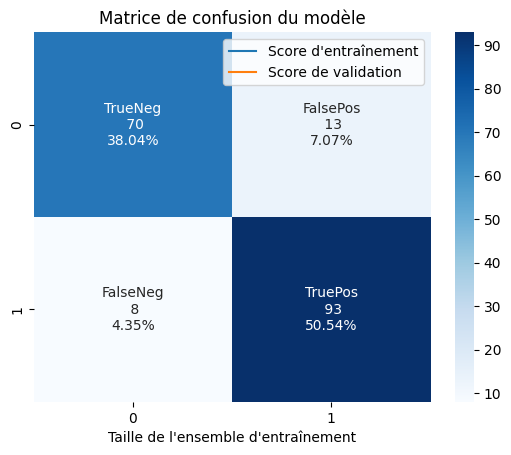

In [15]:
rbf_svm_best_estimator_post_grid = rbf_svm_instance.hyper_parameters_search(X_train, y_train)
best_rbf_svm = Svm(data, features_names, features_nbr, rbf_svm_best_estimator_post_grid)
best_rbf_svm.evaluate_model(X_test, y_test)

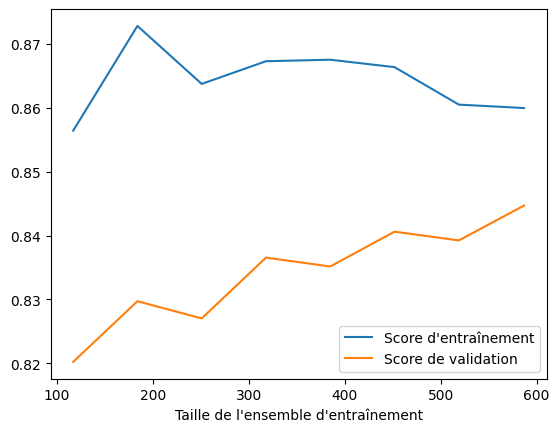

In [24]:
best_rbf_svm.plot_learning_curves(X_train, y_train, train_size)

On remarque que la précision du modèle est la même après optimisation des paramètres. Les courbes de score sont également les mêmes. On aurait pu s'abstenir d'optimiser le paramètre C, comme indiqué dans la documentation sklearn. En effet, il est conseillé de ne pas modifier la valeur de C sauf si les données sont très bruitées.

### 3.3 - SVM à noyau sigmoïde
On s'intéresse maintenant à la classification par machines à vecteurs de support avec un noyau sigmoide. Dans ce cas, le paramètre optimisable est coef0. On observe d'abord le résultat sans optimisation des paramètres.

accuracy du modèle : 0.7608695652173914


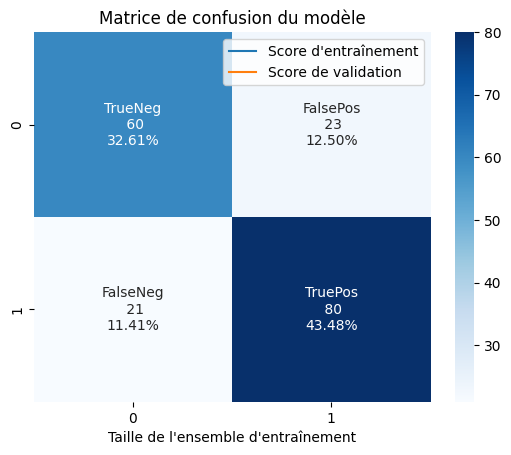

In [16]:
# Création du modèle avec noyau sigmoid
sigmoid_svm_instance = Svm(data, features_names, features_nbr, model='sigmoid')
# Récupération des ensembles d'entraînements et de validation
X_train, X_test, y_train, y_test = sigmoid_svm_instance.split_data(data)
# Entraînement du modèle sur les données d'entraînement
sigmoid_svm_instance.train(X_train, y_train)
# Evaluation du modèle
sigmoid_svm_instance.evaluate_model(X_test,y_test)

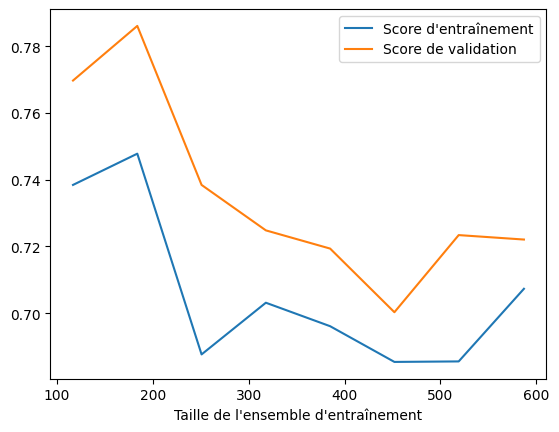

In [25]:
sigmoid_svm_instance.plot_learning_curves(X_train, y_train, train_size)

Les deux courbes de score baissent drastiquement. Cela peut indiquer que le modèle n'est pas bien spécifié ou encore que les données sont mal prétraitées. Essayons d'optimiser les hyper-paramètres afin d'améliorer le fonctionnement du modèle.

0.8435374149659864  pour les hyperparamètres suivants, noyau sigmoïde :  {'coef0': -3}
accuracy du modèle : 0.842391304347826


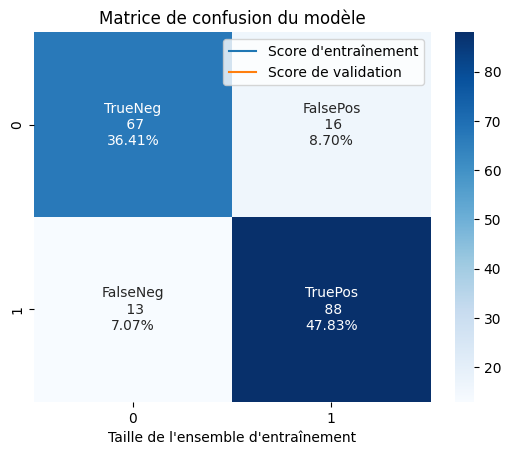

In [17]:
sigmoid_svm_best_estimator_post_grid = sigmoid_svm_instance.hyper_parameters_search(X_train, y_train)
best_sigmoid_svm = Svm(data, features_names, features_nbr, sigmoid_svm_best_estimator_post_grid)
best_sigmoid_svm.evaluate_model(X_test, y_test)

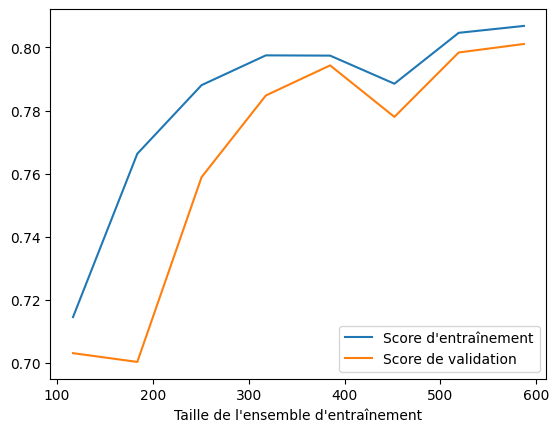

In [26]:
best_sigmoid_svm.plot_learning_curves(X_train, y_train, train_size)

On constate une nette amélioration du modèle de 8%, ainsi que de bien meilleures courbes de score. En effet, les courbes suivent à peu près la même évolution, indiquant que les ajustements sont plutôt corrects.

### 3.4 - SVM à noyau poly
Pour le dernier noyau étudié dans le cadre de ce projet, à savoir le noyau polynomial, celui-ci peut-être optimisé par les hyper-paramètres degree et coef0. Observons les résultats du modèle avant de tenter d'optimiser les paramètres à l'aide d'un GridSearch.

accuracy du modèle : 0.875


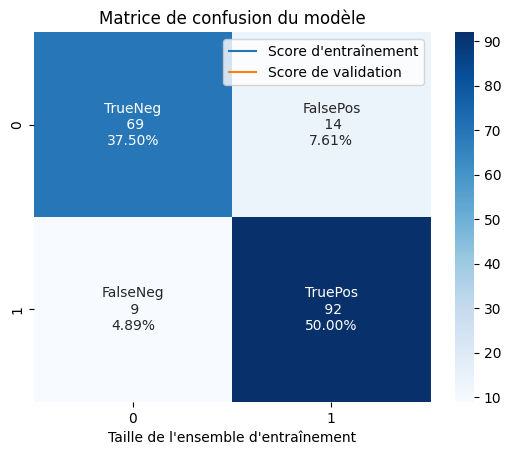

In [18]:
# Création du modèle avec noyau poly
poly_svm_instance = Svm(data, features_names, features_nbr, model='poly')
# Récupération des ensembles d'entraînements et de validation
X_train, X_test, y_train, y_test = poly_svm_instance.split_data(data)
# Entraînement du modèle sur les données d'entraînement
poly_svm_instance.train(X_train, y_train)
# Evaluation du modèle
poly_svm_instance.evaluate_model(X_test,y_test)

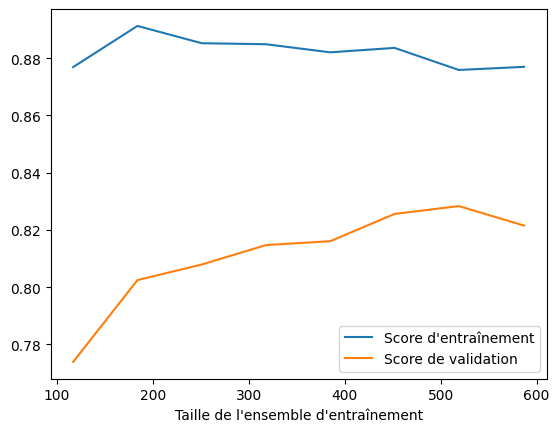

In [27]:
poly_svm_instance.plot_learning_curves(X_train, y_train, train_size)

Les courbes de score des modèles ne sont pas très bonnes. En effet, l'effet "dent-de-scie" observé sur la courbe du score de validation indique que le modèle sur-apprend. Passons à l'optimisation des hyper-paramètres du modèle.

0.8666666666666666  pour les hyperparamètres suivants, noyau polynomial :  {'coef0': 0.1, 'degree': 3}
accuracy du modèle : 0.8858695652173914


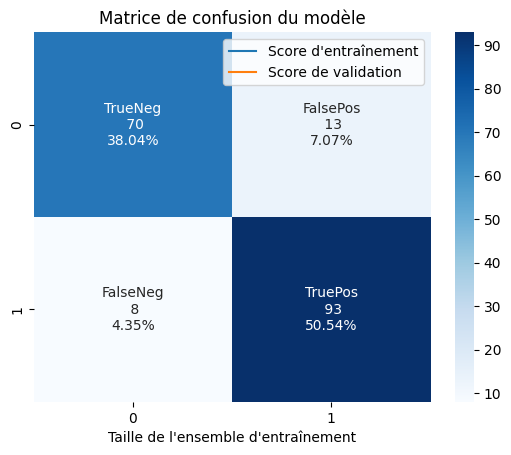

In [19]:
poly_svm_best_estimator_post_grid = poly_svm_instance.hyper_parameters_search(X_train, y_train)
best_poly_svm = Svm(data, features_names, features_nbr, poly_svm_best_estimator_post_grid)
best_poly_svm.evaluate_model(X_test, y_test)

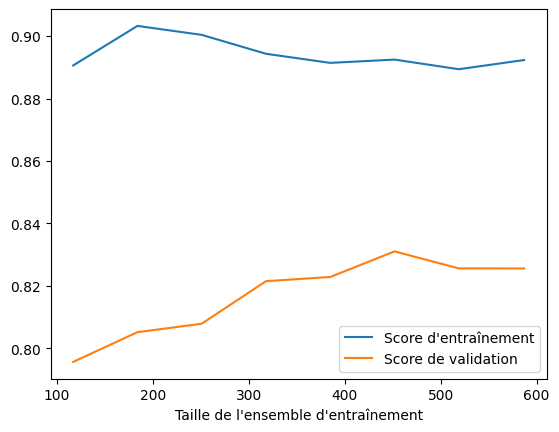

In [28]:
best_poly_svm.plot_learning_curves(X_train, y_train, train_size)

L'amélioration du modèle est faible (1%) après optimisation des hyper-paramètres, et ceci est vérifié par la visualisation des scores qui est sensiblement la même qu'avant optimisation des hyper-paramètres.

### 3.5 - Comparaison des noyaux
Après étude des modèles en fonction des noyaux et optimisation des hyper-paramètres, on remarque que les modèles qui ont la meilleure précision sont les modèles à noyaux rbf et polynomial. Pour autant, la classification par noyau polynomial semble plus prometteuse car les scores d'entraînement et de validation stagnent au fur et à mesure que la taille de l'ensemble d'entraînement augmente.

## 4 - Classification par réseau de neurones
Cette partie est consacrée à l'étude de la classification à l'aide de réseau de neurones. On utilise la classe définie par la bibliothèque sklearn nomée MLPClassifier.
Avant de pouvoir utiliser le modèle, nous devons standardiser et normaliser les données. Nous utiliserons les classes Min-Max-Scaler et StandardScaler de la bibliothèque sklearn.

accuracy du modèle : 0.8478260869565217


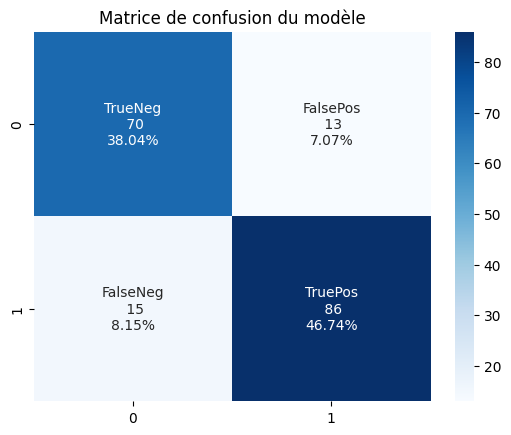

In [20]:
# Création d'une instance du modèle
neural_network = Reseau_neurones(data, features_names, features_nbr)
features_to_standardise = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR']
features_to_normalise = features_names
scaled_data = neural_network.scale_data(features_to_normalise=features_to_normalise, features_to_standardise=features_to_standardise)
X_train, X_test, y_train, y_test = neural_network.split_data(scaled_data)
neural_network.train(X_train, y_train)
neural_network.evaluate_model(X_test,y_test)

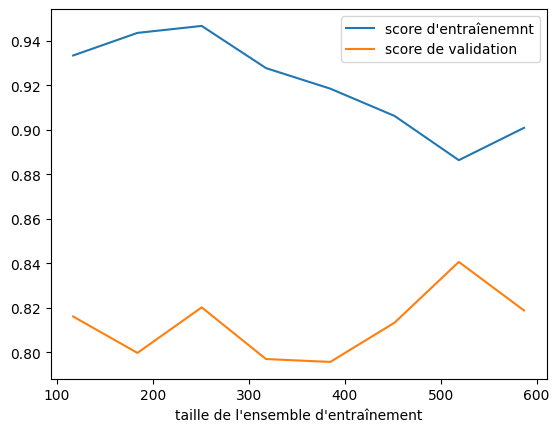

In [21]:
train_size = np.linspace(0.2, 1, 8)
neural_network.plot_learning_curves(X_train, y_train, train_size)

On remarque que le modèle voit son score d'entraînement diminuer drastiquement lorsque la taille de l'ensemble d'entraînement augmente, tandis que la courbe qui retrace le score de validation augmente. Le modèle a donc tendance à sur-apprendre quand la taille de l'ensemble d'entraînement croît. On cherche à optimiser les hyper-paramètres, ce que l'on va réaliser à l'aide d'un GridSearch.

0.8501723977262138  pour les hyperparamètres suivants :  {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (10,), 'max_iter': 500, 'solver': 'adam'}
accuracy du modèle : 0.875


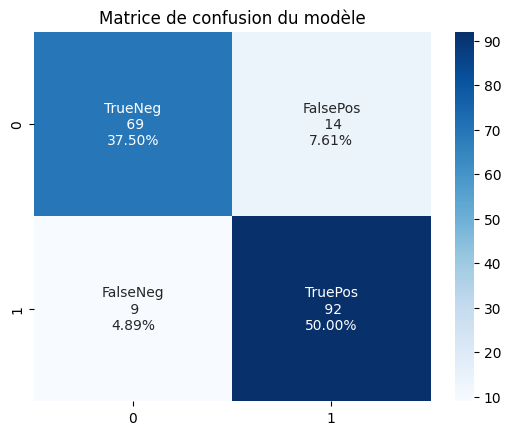

In [22]:
neural_network_best_estimator_post_grid = neural_network.hyper_parameters_search(X_train, y_train)
best_neural_network = Reseau_neurones(scaled_data, features_names, features_nbr, neural_network_best_estimator_post_grid)
best_neural_network.train(X_train,y_train)
best_neural_network.evaluate_model(X_test, y_test)

On constate une amélioration d'environ 3% de la précision du modèle après optimisation des hyper-paramètres.
Observons l'apprentissage du réseau de neurones bien paramétré à l'aide de la méthode partial_fit de la classe MLPClassifier de sklearn.

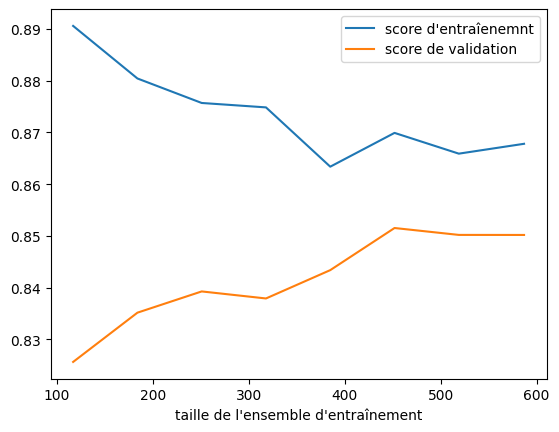

In [23]:
best_neural_network.plot_learning_curves(X_train, y_train, train_size)

Il semble qu'à partir d'un échantillon de 450 données, le modèle dont les hyper-paramètres sont les meilleurs a tendance a moins sur-apprendre.